In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
housing_df = pd.read_excel("housing.xlsx")

In [3]:
housing_df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
housing_df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [5]:
housing_df.rename(columns = {'Transaction date':'date','House Age': 'age','Distance from nearest Metro station (km)':'metro_distance','Number of convenience stores':'stores','Number of bedrooms':'bedrooms','House size (sqft)':'size','House price of unit area':'price'}, inplace = True)

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            414 non-null    float64
 1   age             414 non-null    float64
 2   metro_distance  414 non-null    float64
 3   stores          414 non-null    int64  
 4   latitude        414 non-null    float64
 5   longitude       414 non-null    float64
 6   bedrooms        414 non-null    int64  
 7   size            414 non-null    int64  
 8   price           414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [7]:
housing_df.describe()

,date,age,metro_distance,stores,latitude,longitude,bedrooms,size,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [8]:
housing_df.isnull().sum()/len(housing_df) * 100

date              0.0
age               0.0
metro_distance    0.0
stores            0.0
latitude          0.0
longitude         0.0
bedrooms          0.0
size              0.0
price             0.0
dtype: float64

In [9]:
housing_df.date = housing_df.date.astype(str)

In [10]:
housing_df.date = housing_df.date.str.split('.')

In [11]:
housing_df.loc[:, 'year'] = housing_df.date.map(lambda x: x[0])

#### df['new_col'] = df.A.apply(lambda x: x[0])

In [12]:
housing_df.year = housing_df.year.astype(int)

In [13]:
housing_df.year.value_counts()

2013    288
2012    126
Name: year, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

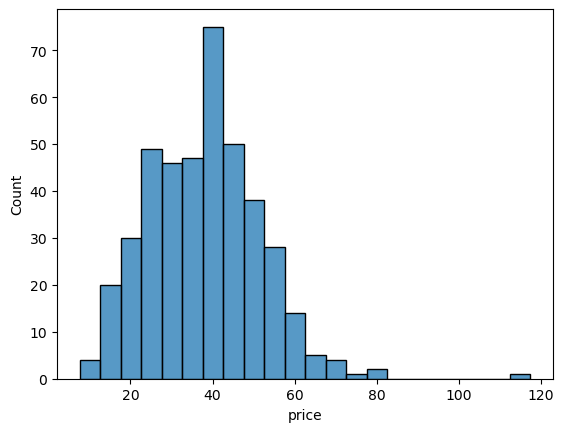

In [14]:
sns.histplot(x = 'price', data = housing_df)

<AxesSubplot:xlabel='price'>

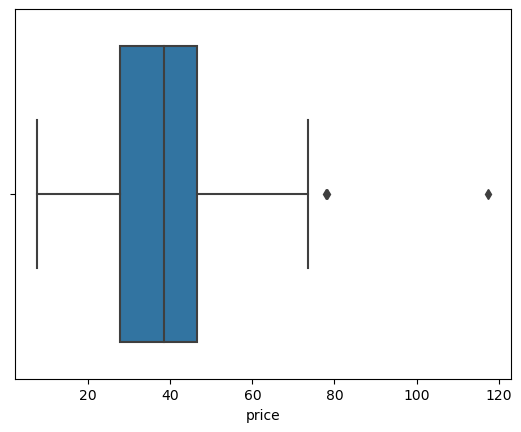

In [15]:
sns.boxplot(x = 'price', data = housing_df)

<AxesSubplot:xlabel='metro_distance'>

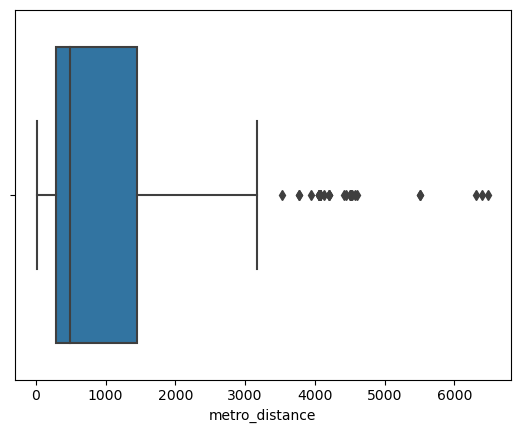

In [16]:
sns.boxplot(x = 'metro_distance', data = housing_df)

<AxesSubplot:xlabel='size'>

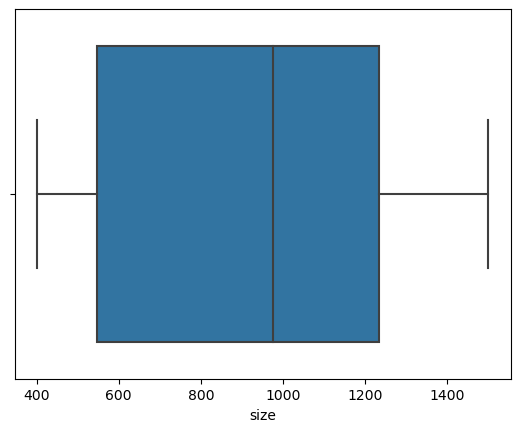

In [17]:
sns.boxplot(x = 'size', data = housing_df)

<AxesSubplot:xlabel='size'>

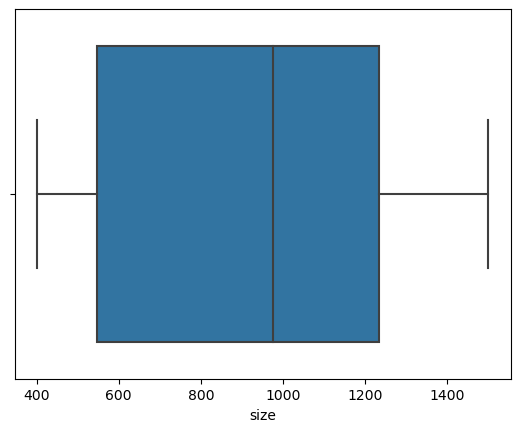

In [18]:
sns.boxplot(x = 'size', data = housing_df)

## removing outliers

In [19]:
q3 = housing_df.price.quantile(0.75) 
q2 = housing_df.price.quantile(0.25)
iqr = q3 - q2
upr_bound = q3 + 1.5 * iqr
lwr_bound = q2 - 1.5 * iqr

In [20]:
housing_df = housing_df.where((housing_df.price > lwr_bound) & (housing_df.price < upr_bound) ) 

In [21]:
q3 = housing_df.metro_distance.quantile(0.75) 
q2 = housing_df.metro_distance.quantile(0.25)
iqr = q3 - q2
upr_bound = q3 + 1.5 * iqr
lwr_bound = q2 - 1.5 * iqr

In [22]:
housing_df = housing_df.where((housing_df.metro_distance > lwr_bound) & (housing_df.metro_distance < upr_bound) ) 

In [23]:
housing_df.dropna(inplace = True)

## Selecting features

<AxesSubplot:>

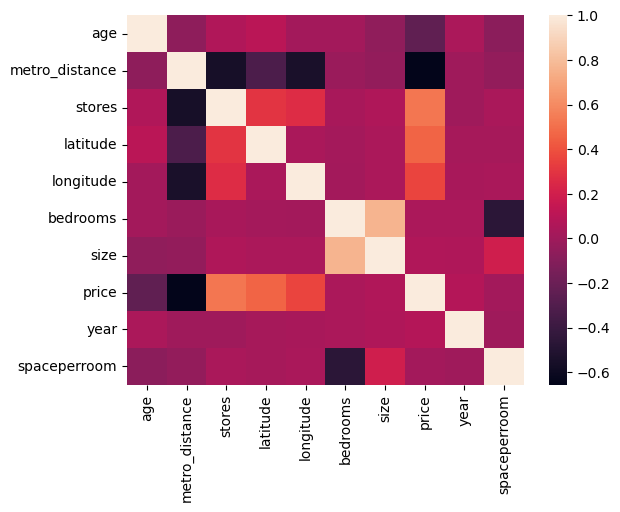

In [25]:
sns.heatmap(housing_df.corr())

In [26]:
housing_df.corr()

,age,metro_distance,stores,latitude,longitude,bedrooms,size,price,year,spaceperroom
age,1.000000,-0.063859,0.062237,0.107118,0.010493,0.014031,-0.055094,-0.247221,0.043837,-0.076096
metro_distance,-0.063859,1.000000,-0.553634,-0.321561,-0.543009,-0.018276,-0.045207,-0.656172,0.002312,-0.042846
stores,0.062237,-0.553634,1.000000,0.300969,0.266609,0.034098,0.059091,0.522972,0.002146,0.036175
latitude,0.107118,-0.321561,0.300969,1.000000,0.042380,0.022069,0.042799,0.460751,0.027404,0.024994
longitude,0.010493,-0.543009,0.266609,0.042380,1.000000,0.013292,0.047800,0.358479,0.034076,0.041985
bedrooms,0.014031,-0.018276,0.034098,0.022069,0.013292,1.000000,0.766588,0.043512,0.044002,-0.463812
size,-0.055094,-0.045207,0.059091,0.042799,0.047800,0.766588,1.000000,0.062942,0.061120,0.196907
price,-0.247221,-0.656172,0.522972,0.460751,0.358479,0.043512,0.062942,1.000000,0.080129,0.016227
year,0.043837,0.002312,0.002146,0.027404,0.034076,0.044002,0.061120,0.080129,1.000000,-0.000899
spaceperroom,-0.076096,-0.042846,0.036175,0.024994,0.041985,-0.463812,0.196907,0.016227,-0.000899,1.000000


## Statistical t-test on price and year

In [27]:
stats.ttest_ind(a=housing_df.price[housing_df.year == 2013], b=housing_df.price[housing_df.year == 2012], equal_var=True)

Ttest_indResult(statistic=1.550457133063128, pvalue=0.12188213811316655)

In [28]:
housing_df = housing_df.drop('year', axis = 1)

In [29]:
housing_df = housing_df.drop('date', axis = 1)

### Conclusion: pvalue > 0.05, thus can exclude year column

<AxesSubplot:xlabel='bedrooms', ylabel='size'>

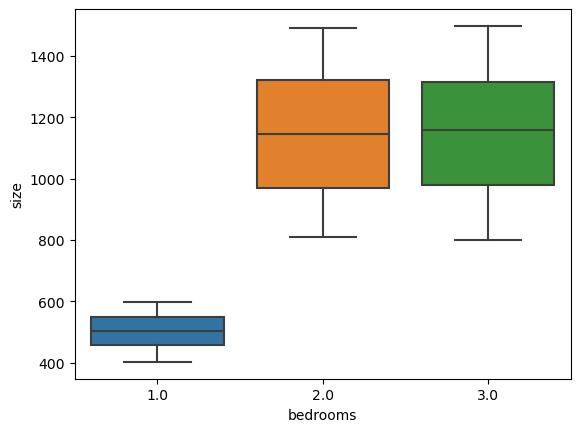

In [30]:
## relation between bedrooms and size
sns.boxplot(y = 'size', x= 'bedrooms', data = housing_df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

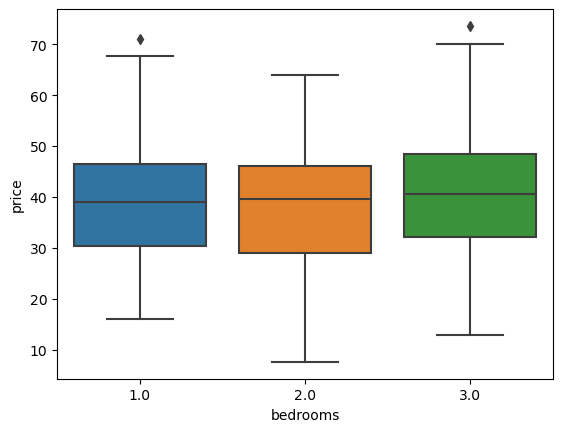

In [31]:
## relation between bedrooms and size
sns.boxplot(y = 'price', x= 'bedrooms', data = housing_df)

In [32]:
stats.ttest_ind(a=housing_df.price[housing_df.bedrooms == 2], b=housing_df.price[housing_df.bedrooms == 3], equal_var=True)


Ttest_indResult(statistic=-1.2778918387775158, pvalue=0.2025019626787927)

### Even if there is high correlation between number of bedrooms and size, 
### Possibility of one of the variable to reduntant seem less as the mean and distribution for 
### almost similar for bedrooms and size, as confirmed from t-test as well 

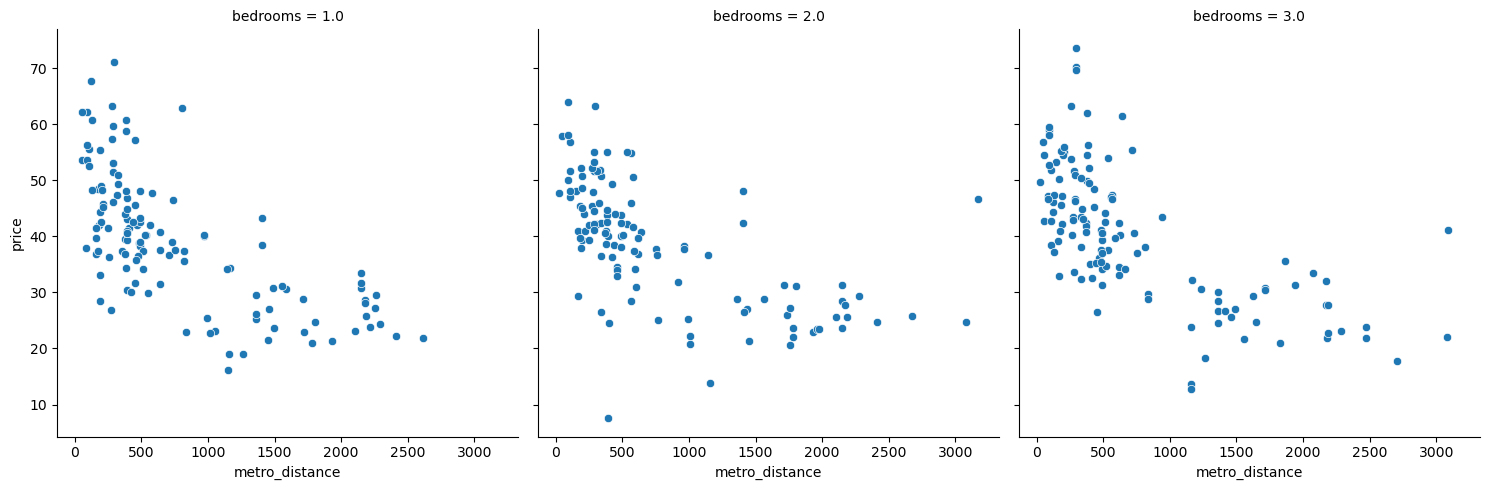

In [33]:
# looking for relation between price and distance from metro, using scatter plot
sns.relplot(x = 'metro_distance', y = 'price', data = housing_df,col = 'bedrooms')


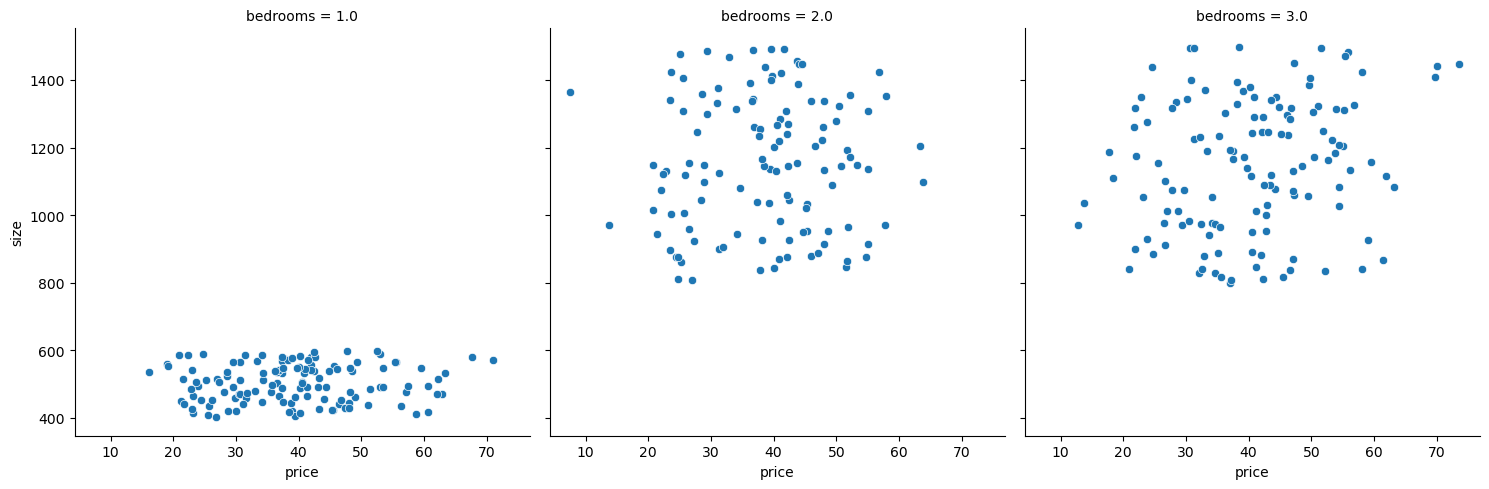

In [34]:
# looking for relation between price and distance from metro, using scatter plot
sns.relplot(y = 'size', x = 'price', data = housing_df,col = 'bedrooms')


### There seem an inverse relation between price and metro_distance

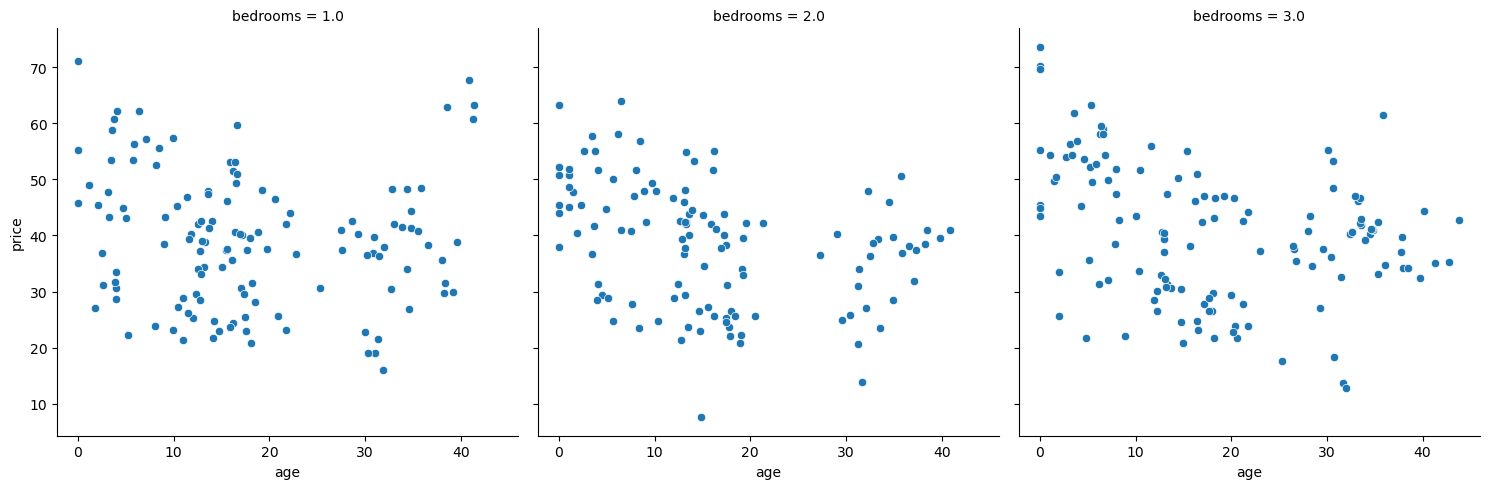

In [35]:
# looking for relation between price and distance from metro, using scatter plot
sns.relplot(x = 'age', y = 'price', data = housing_df, col = 'bedrooms')


<AxesSubplot:xlabel='stores', ylabel='price'>

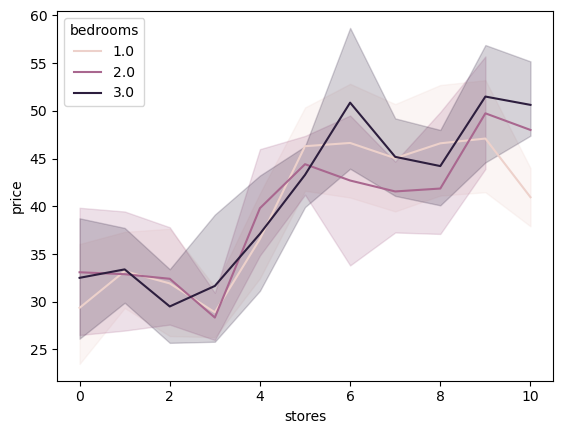

In [36]:
# looking for relation between price and distance from metro, using scatter plot
sns.lineplot(x = 'stores', y = 'price', data = housing_df, hue = 'bedrooms')


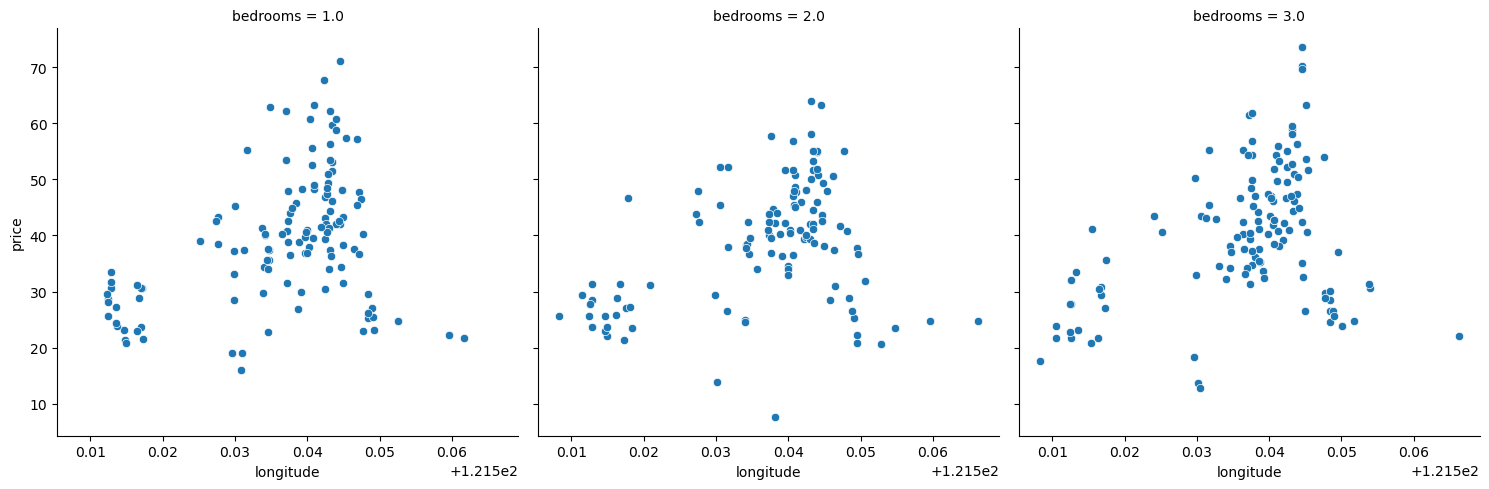

In [37]:
sns.relplot(x = 'longitude', y = 'price', data = housing_df, col = 'bedrooms')

<AxesSubplot:xlabel='metro_distance', ylabel='stores'>

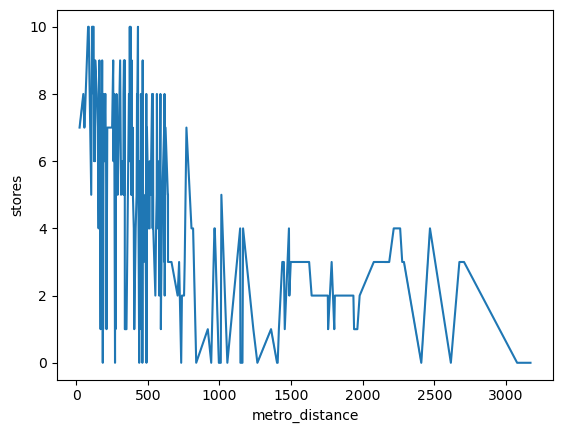

In [38]:
sns.lineplot(y = 'stores', x = 'metro_distance', data = housing_df)

## Model building

In [39]:
housing_df.columns

Index(['age', 'metro_distance', 'stores', 'latitude', 'longitude', 'bedrooms',
       'size', 'price', 'spaceperroom'],
      dtype='object')

In [40]:
housing_df = housing_df.reset_index(drop = True)

In [41]:
scalar = StandardScaler()

In [42]:
features = ['age', 'stores', 'metro_distance','latitude', 'longitude']
target = ['price']

In [43]:
df = pd.DataFrame(scalar.fit_transform(housing_df), columns = housing_df.columns)

In [44]:
x = df[features]
y = df[target]

rand_dict = {}
for i in range(1,100):
    xtrain, xtest, ytrain, ytest = train_test_split(x , y,test_size = 0.15, random_state = i)
    lr = LinearRegression()
    lr.fit(X = xtrain, y = ytrain)
    y_predict = lr.predict(xtest)
    # r-squared
    rand_dict[i] = r2_score(ytest, y_predict)

value, Keymax  = max(zip(rand_dict.values(), rand_dict.keys()))

In [105]:
rand_dict = {}
for i in range(1,200):
    xtrain, xtest, ytrain, ytest = train_test_split(x , y,test_size = 0.20, random_state = i)
    lr = LinearRegression()
    lr.fit(X = xtrain, y = ytrain)
    y_predict = lr.predict(xtest)
    rand_dict[i] = [abs(lr.score(xtrain, ytrain) - lr.score(xtest, ytest))]


In [107]:
value, Keymax  = min(zip(rand_dict.values(), rand_dict.keys()))

In [108]:
value

[0.0003376498503242509]

In [109]:
Keymax

106

In [112]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = Keymax)
lr = LinearRegression()
lr.fit(X = xtrain, y = ytrain)
y_predict = lr.predict(xtest)
r2_score(ytest, y_predict)

0.6242030332329866

In [113]:
lm = sm.OLS(ytrain, xtrain).fit()   
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.625
Model:                            OLS   Adj. R-squared (uncentered):              0.618
Method:                 Least Squares   F-statistic:                              97.83
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                    1.92e-60
Time:                        11:57:36   Log-Likelihood:                         -269.94
No. Observations:                 299   AIC:                                      549.9
Df Residuals:                     294   BIC:                                      568.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age               -0.3311      0.036     -9.275      0.000      -0.401      -0.261
stores             0.1954      0.042      4.609      0.000       0.112       0.279
metro_distance    -0.4660      0.054     -8.684      0.000      -0.572      -0.360
latitude           0.3007      0.037      8.096      0.000       0.228       0.374
longitude          0.0121      0.046      0.261      0.794      -0.079       0.103
==============================================================================
Omnibus:                       34.283   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.096
Skew:                           0.321   Prob(JB):                     1.89e-32
Kurtosis:                       6.364   Cond. No.                         2.67
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""